Lehcene Mohamed Lemine => SDIA ML

In [2]:
#Stup 1 => Importer Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Lehcene Mohamed Lemine => SDIA ML

In [3]:
#Stup 2 => Telecharger Date Set occurancy
dataset = pd.read_csv("/Users/HP/Desktop/ExamenMLSDIA/Data/occupancy.csv")
dataset.head()

#date CO2 Occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Lehcene Mohamed Lemine => SDIA ML

In [4]:
#pour afficher des informations sur data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


Lehcene Mohamed Lemine => SDIA ML

In [5]:
#Setup 3 => Cleaning Data 
df = dataset.drop(["date","Occupancy"],axis=1)

Lehcene Mohamed Lemine => SDIA ML

In [6]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.7000,26.272,585.200000,749.200000,0.004764
141,23.7180,26.290,578.400000,760.400000,0.004773
142,23.7300,26.230,572.666667,769.666667,0.004765
143,23.7225,26.125,493.750000,774.750000,0.004744
144,23.7540,26.200,488.600000,779.000000,0.004767


Lehcene Mohamed Lemine => SDIA ML

In [7]:
#je fait filter les attributs qui concernant Featuers seulement
dfFeatures = df[["Temperature","Humidity","Light","HumidityRatio"]]
dfFeatures.head()

,Temperature,Humidity,Light,HumidityRatio
140,23.7000,26.272,585.200000,0.004764
141,23.7180,26.290,578.400000,0.004773
142,23.7300,26.230,572.666667,0.004765
143,23.7225,26.125,493.750000,0.004744
144,23.7540,26.200,488.600000,0.004767


Lehcene Mohamed Lemine => SDIA ML

In [8]:
#je filtre les attributs qui concerne Target => y
dfTarget = df[["CO2"]]
dfTarget.head()

,CO2
140,749.200000
141,760.400000
142,769.666667
143,774.750000
144,779.000000


Lehcene Mohamed Lemine => SDIA ML

In [9]:
#Setup 4 => Normalize Features
dfFeatures.iloc[:,0:] = (dfFeatures-dfFeatures.mean())/(dfFeatures.std())
dfFeatures.head()

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Temperature,Humidity,Light,HumidityRatio
140,2.204349,0.376743,1.566568,1.207314
141,2.221858,0.384130,1.539391,1.221232
142,2.233531,0.359508,1.516477,1.208934
143,2.226235,0.316419,1.201077,1.173919
144,2.256877,0.347197,1.180494,1.211295


Lehcene Mohamed Lemine => SDIA ML

In [10]:
#Stup 5 => Separer Features X and Target y

#Create matrix X
x = dfFeatures.iloc[:,0:]

#Inclut in matrix X le Biais
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(2665, 5)
[[2.20434866 0.37674296 1.56656818 1.20731364 1.        ]
 [2.22185797 0.38412957 1.53939111 1.22123167 1.        ]
 [2.23353085 0.35950754 1.51647711 1.2089343  1.        ]
 [2.2262353  0.316419   1.20107652 1.17391931 1.        ]
 [2.2568766  0.34719653 1.18049389 1.21129511 1.        ]
 [2.26271304 0.37181856 1.5004906  1.2321582  1.        ]
 [2.23353085 0.38412957 1.37126628 1.22692361 1.        ]
 [2.2568766  0.38412957 1.2620251  1.23831844 1.        ]
 [2.2568766  0.4087516  1.13013637 1.25633479 1.        ]
 [2.23936729 0.42516629 1.26602173 1.25976552 1.        ]]


Lehcene Mohamed Lemine => SDIA ML

In [11]:
#Create Theta
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(5,1)
print('Theta:',theta)
theta.shape

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


(5, 1)

Lehcene Mohamed Lemine => SDIA ML

In [12]:
#Create matrix Target => y
y = dfTarget.iloc[:,0:1].values
y.shape

(2665, 1)

Lehcene Mohamed Lemine => SDIA ML

In [13]:
#Stup  6 => Develloper Model
#Develloper la model
def model(X, theta):
    return X.dot(theta)

Lehcene Mohamed Lemine => SDIA ML

In [15]:
#Fonction cout
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

Lehcene Mohamed Lemine => SDIA ML

In [16]:
cost_function(X, y, theta)

297775.24685991206

Lehcene Mohamed Lemine => SDIA ML

In [17]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

Lehcene Mohamed Lemine => SDIA ML

In [18]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

Lehcene Mohamed Lemine => SDIA ML

In [19]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

Lehcene Mohamed Lemine => SDIA ML

In [20]:
theta_final[0]

array([43.4783585])

Lehcene Mohamed Lemine => SDIA ML

In [21]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
predictions

array([[1070.10361445],
       [1071.25071064],
       [1066.44450524],
       ...,
       [1142.6176172 ],
       [1143.9380247 ],
       [1143.28112566]])

Lehcene Mohamed Lemine => SDIA ML

Pour Evolutions des erreurs pour notre model

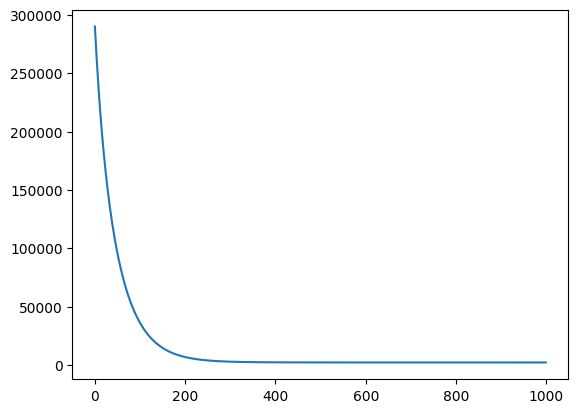

In [23]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

Lehcene Mohamed Lemine => SDIA ML

In [24]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

Lehcene Mohamed Lemine => SDIA ML

In [25]:
coef_determination(y, predictions)

0.9504941196421407